In [1]:
# !pip install PIL
# !pip install wheel==0.38.4
# !pip install setuptools==65
# !pip install gym==0.21
# !pip install torchrl
# # pip install stable-baselines3[extra]
# !pip install torchvision
# !pip install gym==0.21
# !pip install --upgrade ipykernel
# !pip install matplotlib
# !pip install gym[atari,accept-rom-license]==0.21.0
# !pip install joblib
# !pip install tqdm
# !pip install image

In [2]:
# hide imports
from IPython.display import clear_output
from PIL import Image
import time
import matplotlib.pyplot as plt
import gym
import torchvision
import numpy as np
import torchrl
import torch
import logging
import tqdm
from torchrl.envs import *
from torchrl.envs.libs.gym import *
from joblib import Parallel, delayed
import warnings
from multiprocessing import Pool
warnings.filterwarnings('ignore')

random_seed = 21

torch.manual_seed(random_seed)
np.random.seed(random_seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("deivce is", device)

deivce is cpu


In [3]:
gym.version.VERSION

'0.21.0'

In [4]:
from Environment.Environment import *

env_name = "CartPole-v1"

env = gym.make(env_name)

n_actions = env.action_space.n

state = env.reset()

In [5]:
from Agent import AgentCartpole


agent = AgentCartpole.Agent(n_observe=4, n_actions=n_actions)

In [6]:
from Learning.LearningCartpole import Learning

learn = Learning(env_name)

In [7]:
loading = False

In [8]:
print(agent.get_epsilon())

1.0


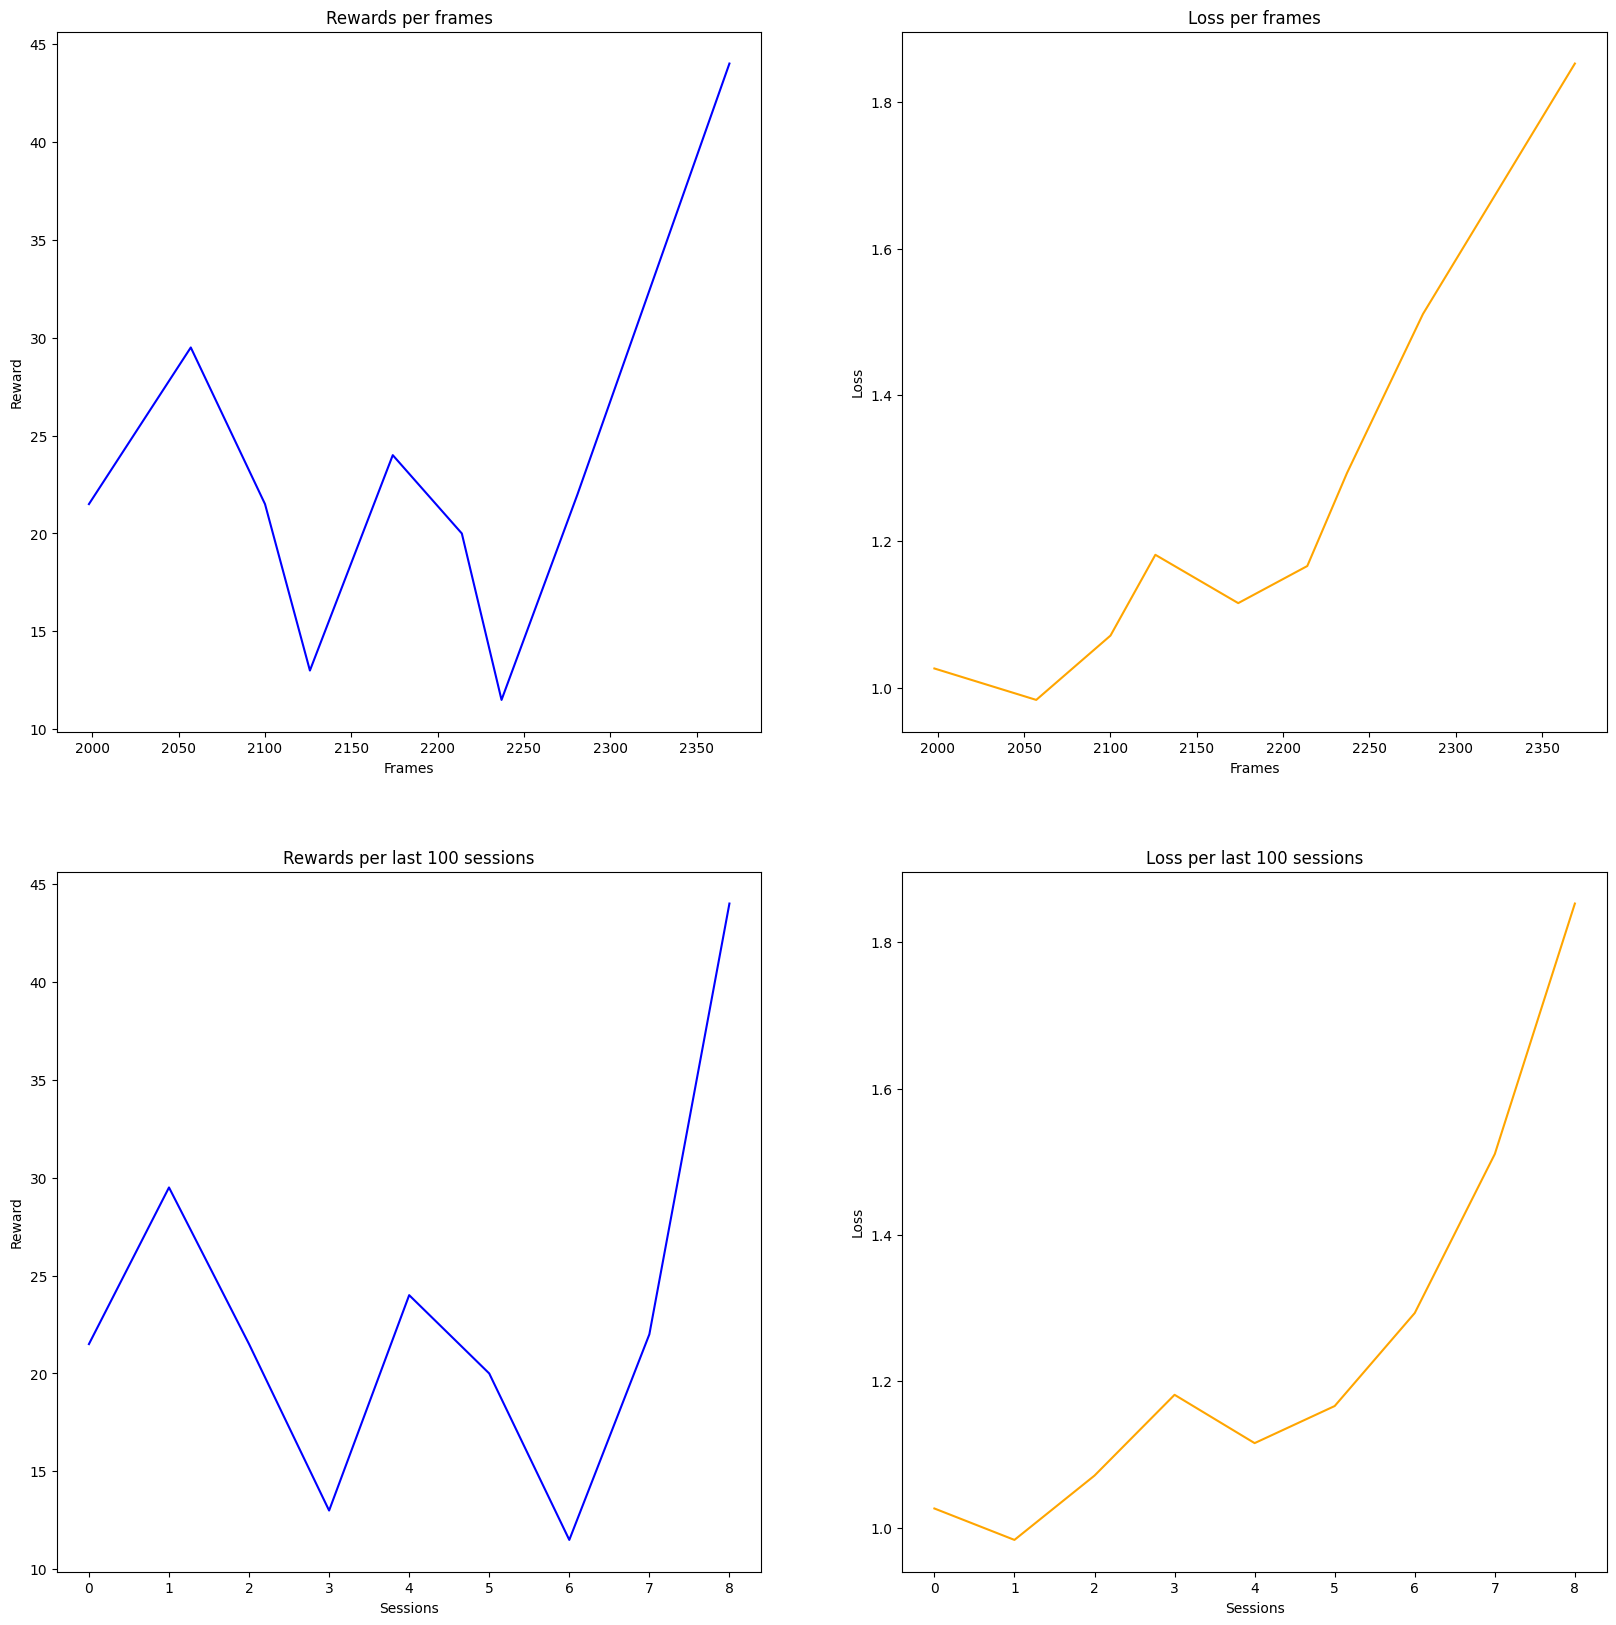

for frame =  2369 , epsilon =  0.937540317781532


100%|██████████| 2/2 [00:00<00:00, 134.85it/s]

tensor([3.1075, 3.2628])
tensor(3.2628) tensor(1)
tensor([3.8774, 4.7660])
tensor(4.7660) tensor(1)
[21.]
tensor([3.0634, 3.2338])
tensor(3.2338) tensor(1)
[24.]
in layer 0 tensor(2.0738e-05)
in layer 1 tensor(-0.0396)
in layer 2 tensor(-0.0030)
in layer 3 tensor(-0.0174)
in layer 4 tensor(-0.2841)
in layer 5 tensor(-0.9303)
mean gradient is tensor(-0.0042)


In [9]:
if loading:
    try:
        agent.load()
    except:
        pass

agent.save()

print("preparing (add random states to replay buffer)")
if not loading:
    for i in tqdm.tqdm(range(100)):
        learn.play_session(agent, epsilon=1)
else:
    for i in tqdm.tqdm(range(20)):
        learn.play_session(agent)

epoch = 0
while True:
    rewards = np.asarray([])
    for _ in tqdm.tqdm(range(2)):
        reward_for_session = learn.play_session(agent, t_max=(int)(agent.t_max))
        reward_for_session = np.asarray([reward_for_session])
        print(reward_for_session)
        rewards = np.concatenate([rewards, reward_for_session])
    
    # loss = agent.train(batch_size)
    
    Loss = agent.train(32)
    agent.loss_history.append(Loss)
    agent.reward_history.append(np.mean(rewards))
    agent.frames.append(agent.cnt_frames)
    time.sleep(1)

    clear_output(True)
    
    agent.plot_results()
    print("for frame = ", agent.cnt_frames, ", epsilon = ", agent.get_epsilon())


    agent.t_max *= 1.01
    epoch += 1
    agent.t_max = min(agent.t_max, (int)(4e4))

    if epoch % 10 == 1:
        agent.save()
        print('saved successfully')  
